In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.signal import butter, lfilter

In [2]:
y, sr = librosa.load("/home/adit/Downloads/EE798P/Datasets/Melody Estimation/adc2004_full_set/daisy1.wav")

In [3]:
BPF_LOW = 50
BPF_HIGH = 1000

WIN_LENGTH = 50

In [4]:
def bandpass_filter(y, sr):
  nyquist = 0.5 * sr
  low = BPF_LOW / nyquist
  high = BPF_HIGH / nyquist
  b, a = butter(5, [low, high], btype='band')
  y_processed = lfilter(b, a, y)
  return np.array(y_processed)

In [27]:
def hpss(y):
  y_harmonic, _ = librosa.effects.hpss(y, margin=(1, 1))
  return y_harmonic

In [28]:
def vocal_sep(y):
  s_full, phase = librosa.magphase(librosa.stft(y))
  print("Debug: s_full.shape = ", s_full.shape)
  s_filter = librosa.decompose.nn_filter(s_full, aggregate=np.median, metric='cosine')
  print("Debug: s_filter.shape = ", s_filter.shape)
  s_filter = np.minimum(s_full, s_filter)
  print("Debug: s_filter.shape = ", s_filter.shape)
  power, margin_v = 2, 10
  mask_v = librosa.util.softmask(s_full - s_filter, margin_v * s_filter, power=power)
  s_foreground = mask_v * s_full
  
  plt.figure(figsize=(12, 8))
  librosa.display.specshow(librosa.amplitude_to_db(s_foreground, ref=np.max), y_axis='log', x_axis='time')
  plt.title('Foreground')
  plt.colorbar()
  plt.tight_layout()
  plt.show()
  
  y_processed = librosa.istft(s_foreground * phase)
  return y_processed

(464896,)
(464896,)
Debug: s_full.shape =  (1025, 909)
Debug: s_filter.shape =  (1025, 909)
Debug: s_filter.shape =  (1025, 909)


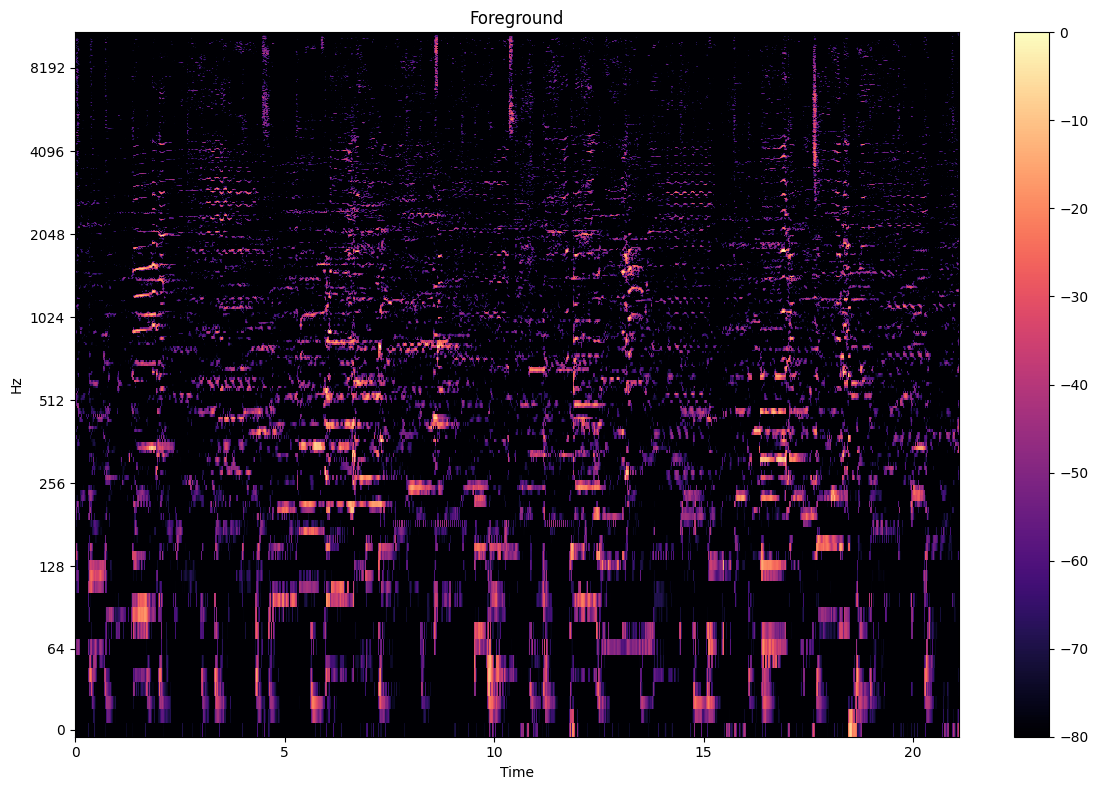

In [29]:
y_filtered = bandpass_filter(y, sr)
print(y_filtered.shape)

y_harmonic = hpss(y)
print(y_harmonic.shape)

y_vocal = vocal_sep(y)

In [30]:
from IPython.display import Audio

In [31]:
Audio(data=y_harmonic, rate=sr)